# Lab 7

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

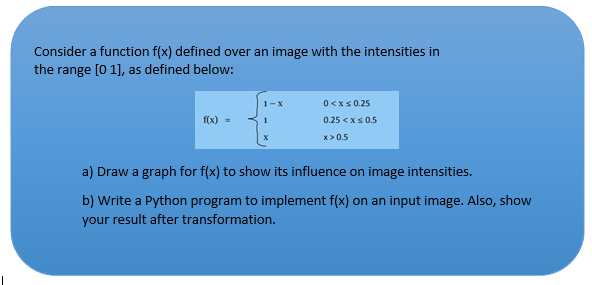

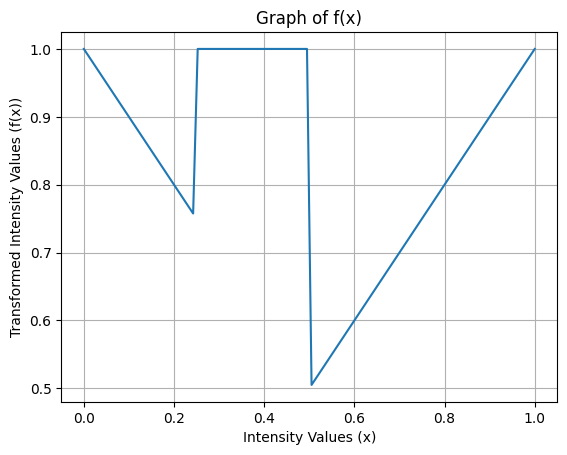

In [29]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    y = np.zeros_like(x)
    y[x <= 0.25] = 1 - x[x <= 0.25]
    y[(x > 0.25) & (x <= 0.5)] = 1
    y[x > 0.5] = x[x > 0.5]
    return y

x_values = np.linspace(0, 1, num=100)

y_values = f(x_values)

plt.plot(x_values, y_values)
plt.title('Graph of f(x)')
plt.xlabel('Intensity Values (x)')
plt.ylabel('Transformed Intensity Values (f(x))')
plt.grid(True)
plt.show()


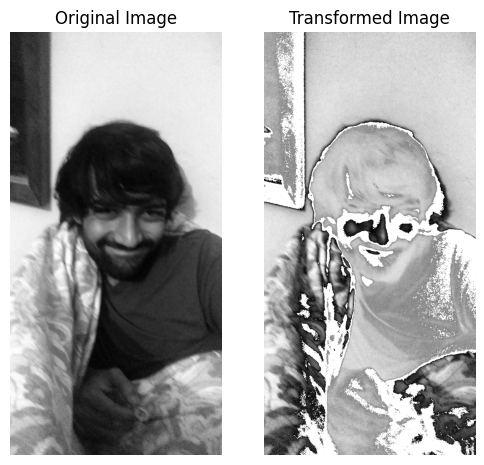

In [30]:
input_image = cv2.imread('images/khali.jpg', cv2.IMREAD_GRAYSCALE)

input_image_normalized = input_image / 255.0

transformed_image = f(input_image_normalized)

transformed_image_uint8 = (transformed_image * 255).astype(np.uint8)

fig, axes = plt.subplots(1, 2, figsize=(6, 6))
ax = axes.ravel()

ax[0].imshow(input_image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(transformed_image_uint8, cmap='gray')
ax[1].set_title('Transformed Image')
ax[1].axis('off')

plt.show()


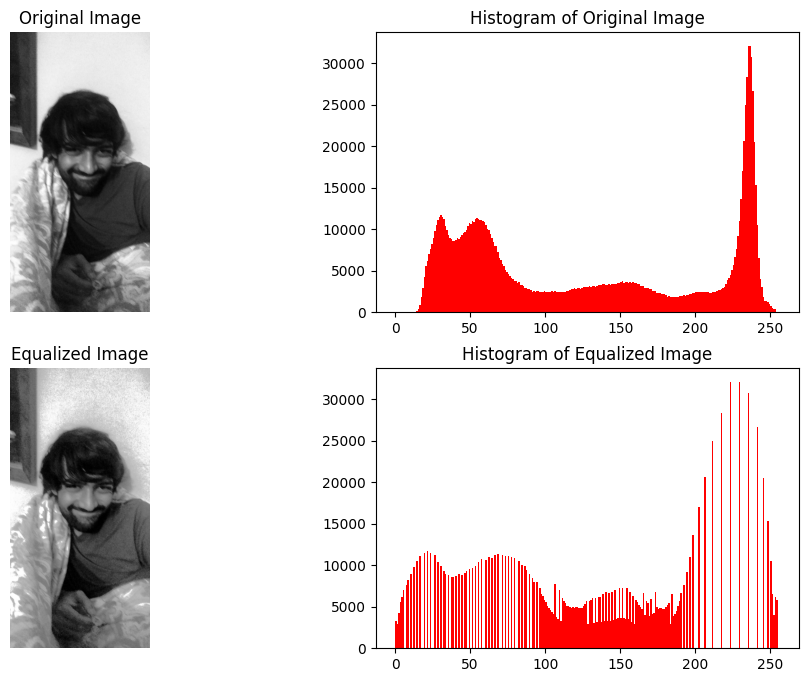

In [38]:
def myhist_equ(image):
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])
    
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()
    # print(hist)
    cdf_m = np.ma.masked_equal(cdf, 0)
    
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')
    
    equalized_image = cdf[image]
    
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(2, 2, 2)
    plt.hist(image.flatten(), 256, [0, 256], color='r')
    plt.title('Histogram of Original Image')
    
    plt.subplot(2, 2, 3)
    plt.imshow(equalized_image, cmap='gray')
    plt.title('Equalized Image')
    plt.axis('off')
    
    plt.subplot(2, 2, 4)
    plt.hist(equalized_image.flatten(), 256, [0, 256], color='r')
    plt.title('Histogram of Equalized Image')
    
    plt.show()

image = cv2.imread('images/khali.jpg', cv2.IMREAD_GRAYSCALE)

myhist_equ(image)
